
Context:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information:

- Age: age of the patient [years]  
- Sex: sex of the patient [`M`: Male, `F`: Female]  
- Chest Pain Type: chest pain type [`TA`: Typical Angina, `ATA`: Atypical Angina, `NAP`: Non-Anginal Pain, `ASY`: Asymptomatic]  
- Resting BP: resting blood pressure [mm Hg]  
- Cholesterol: serum cholesterol [mg/dl]  
- Fasting BS: fasting blood sugar [`1`: if Fasting BS > 120 mg/dl, `0`: otherwise]  
- Resting ECG: resting electrocardiogram results [`Normal`: Normal, `ST`: ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV), `LVH`: probable or definite left ventricular hypertrophy by Estes' criteria]  
- Max HR: maximum heart rate achieved [numeric value between 60 and 202]  
- Exercise Angina: exercise-induced angina [`Y`: Yes, `N`: No]  
- Old Peak: ST depression induced by exercise relative to rest [numeric]  
- ST Slope: the slope of the peak exercise ST segment [`Up`: upsloping, `Flat`: flat, `Down`: downsloping]  
- Heart Disease: output class [`1`: heart disease, `0`: normal]

In [55]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [56]:
# Load the dataset
df = pd.read_csv("/Users/ajaynara/Documents/GitHub/ai-sessions/heart.csv")

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (918, 12)

First few rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           in

In [57]:
# Exploratory Data Analysis (EDA)

# Statistical summary
print("Statistical Summary:")
print(df.describe())
print("\n")

# Check unique values for categorical columns
print("Unique values in categorical columns:")
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

Statistical Summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Unique values in categorical columns:
Se

Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Target Variable Proportion:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


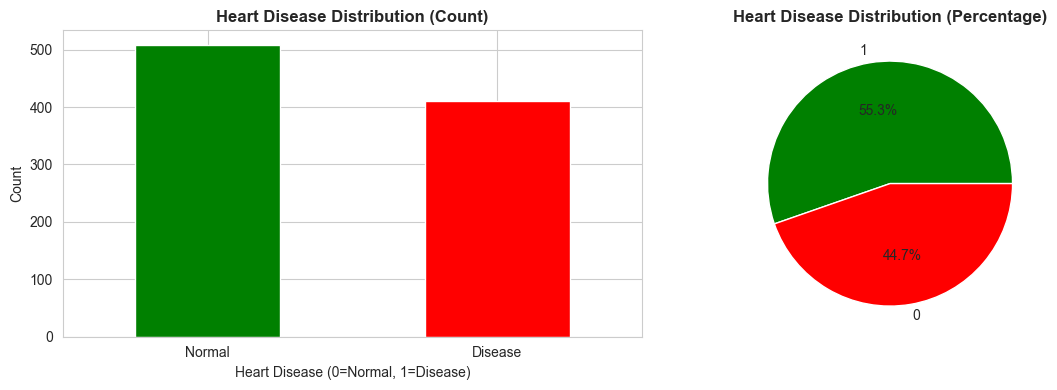

In [58]:
# Distribution of Target Variable
print("Target Variable Distribution:")
print(df['HeartDisease'].value_counts())
print("\nTarget Variable Proportion:")
print(df['HeartDisease'].value_counts(normalize=True))

# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df['HeartDisease'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Heart Disease Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Heart Disease (0=Normal, 1=Disease)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Normal', 'Disease'], rotation=0)

# Pie chart
df['HeartDisease'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Heart Disease Distribution (Percentage)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

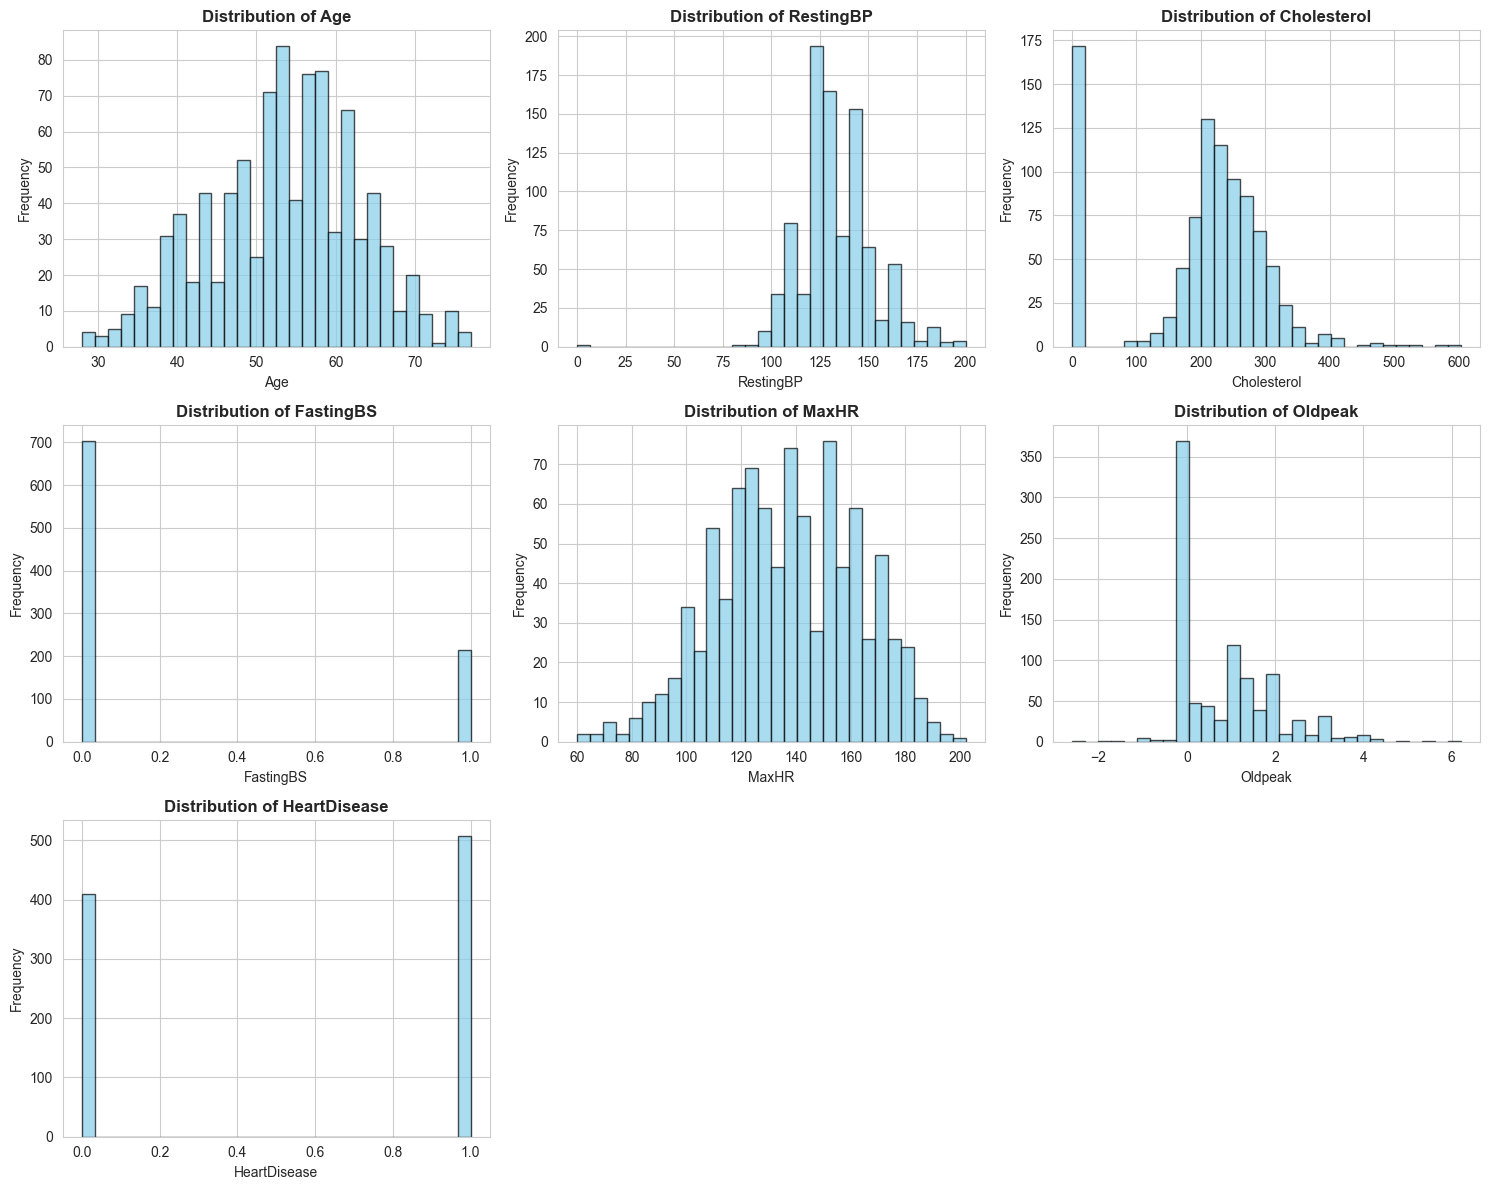

Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [59]:
# Numeric columns visualization
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Distribution plots for numeric features
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("Numeric columns:", numeric_cols)

In [60]:
# Data Preprocessing for Correlation Analysis

# Create a copy of the dataframe
df_encoded = df.copy()

# Identify categorical columns
categorical_features = df_encoded.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_features)

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"\n{col} encoding:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

Categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Sex encoding:
{'F': 0, 'M': 1}

ChestPainType encoding:
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

RestingECG encoding:
{'LVH': 0, 'Normal': 1, 'ST': 2}

ExerciseAngina encoding:
{'N': 0, 'Y': 1}

ST_Slope encoding:
{'Down': 0, 'Flat': 1, 'Up': 2}


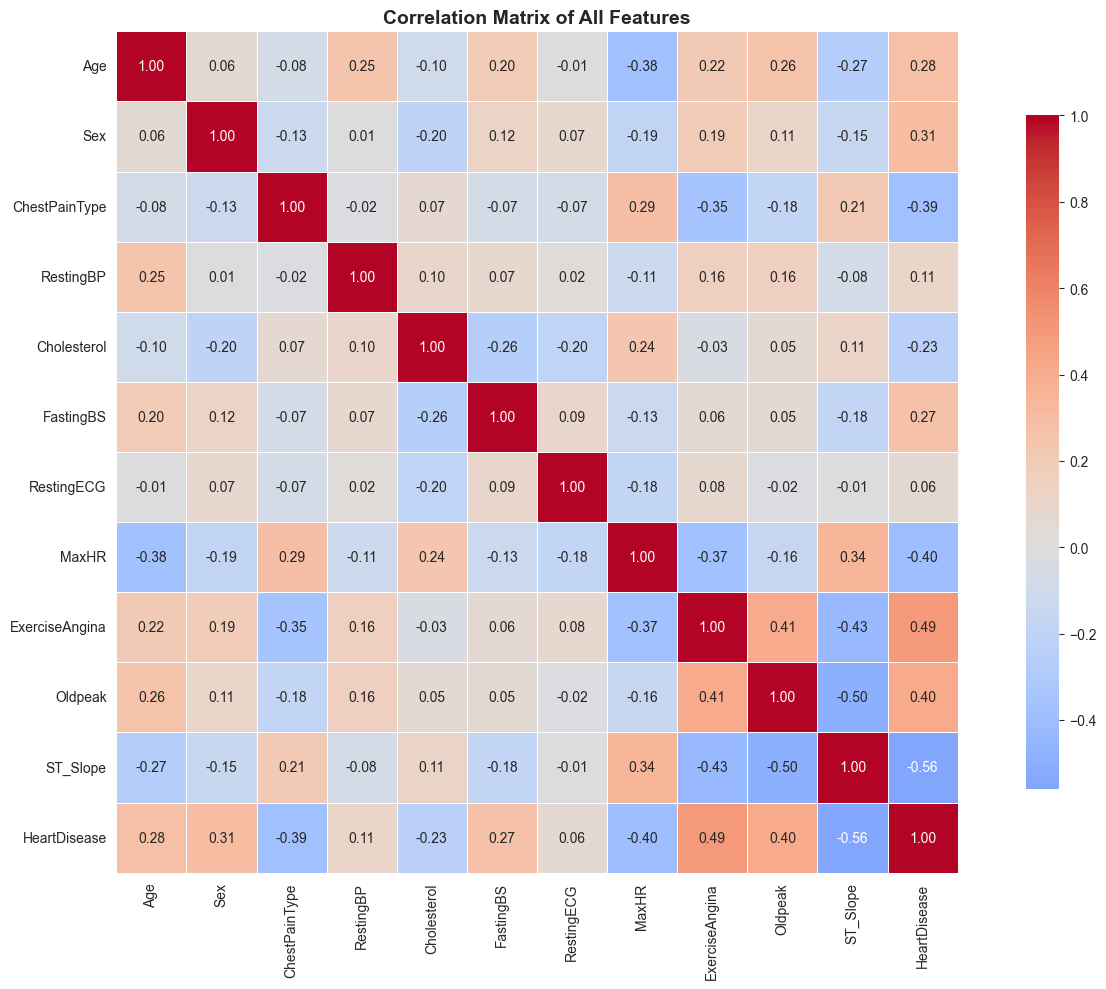


Correlation with Heart Disease:
HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


In [61]:
# Correlation analysis
correlation_matrix = df_encoded.corr()

# Heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature correlation with target
print("\nCorrelation with Heart Disease:")
print(correlation_matrix['HeartDisease'].sort_values(ascending=False))

In [62]:
# Prepare data for Logistic Regression
# Use the already encoded dataframe
df_model = df_encoded.copy()

print("Data prepared for model training")
print(f"DataFrame shape: {df_model.shape}")
print(f"Data types:\n{df_model.dtypes}")

Data prepared for model training
DataFrame shape: (918, 12)
Data types:
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [63]:
# Separate features and target variable
X = df_model.drop('HeartDisease', axis=1)
y = df_model['HeartDisease']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:")
print(X.columns.tolist())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"\nTesting set class distribution:\n{y_test.value_counts()}")

Features shape: (918, 11)
Target shape: (918,)

Features:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

Training set size: 734
Testing set size: 184
Training set class distribution:
HeartDisease
1    406
0    328
Name: count, dtype: int64

Testing set class distribution:
HeartDisease
1    102
0     82
Name: count, dtype: int64


In [64]:
# Feature Scaling - Important for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled training data - First few rows:")
print(X_train_scaled.head())
print("\nMean of scaled features (should be close to 0):")
print(X_train_scaled.mean())
print("\nStandard deviation of scaled features (should be close to 1):")
print(X_train_scaled.std())

Scaled training data - First few rows:
        Age      Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.970012  0.51740       0.237876   0.339016     0.127137   1.835497   
1  0.122028  0.51740       0.237876  -1.266031     0.099443   1.835497   
2  0.546020 -1.93274      -0.801417  -0.159102     1.244113   1.835497   
3 -0.725956  0.51740      -0.801417   1.501291    -1.876035  -0.544812   
4 -0.407962  0.51740      -0.801417   0.671094    -1.876035   1.835497   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0    1.610205 -0.324520        1.202775  0.317046 -0.604727  
1    1.610205  1.689837       -0.831411 -0.440356  1.063955  
2    1.610205 -0.247045        1.202775  0.601071 -0.604727  
3    0.010894 -0.479470        1.202775 -0.819056 -0.604727  
4    0.010894  0.101594        1.202775 -0.156330 -0.604727  

Mean of scaled features (should be close to 0):
Age               2.105491e-16
Sex              -9.438408e-17
ChestPainType     3.388147e-17
Re

In [65]:
# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Get probability predictions for ROC curve
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Model Trained Successfully!")
print("\nModel Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients)
print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

Logistic Regression Model Trained Successfully!

Model Coefficients:
           Feature  Coefficient
10        ST_Slope    -1.204104
2    ChestPainType    -0.702255
8   ExerciseAngina     0.536199
1              Sex     0.476509
4      Cholesterol    -0.474871
5        FastingBS     0.438204
9          Oldpeak     0.253479
7            MaxHR    -0.243404
6       RestingECG    -0.157095
3        RestingBP     0.067722
0              Age     0.042982

Intercept: 0.4814


In [66]:
# Model Evaluation

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

# Display metrics
print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\n{'Metric':<20} {'Training':<15} {'Testing':<15}")
print("-"*60)
print(f"{'Accuracy':<20} {train_accuracy:<15.4f} {test_accuracy:<15.4f}")
print(f"{'Precision':<20} {train_precision:<15.4f} {test_precision:<15.4f}")
print(f"{'Recall':<20} {train_recall:<15.4f} {test_recall:<15.4f}")
print(f"{'F1-Score':<20} {train_f1:<15.4f} {test_f1:<15.4f}")
print(f"{'ROC-AUC':<20} {train_auc:<15.4f} {test_auc:<15.4f}")
print("="*60)

MODEL PERFORMANCE METRICS

Metric               Training        Testing        
------------------------------------------------------------
Accuracy             0.8556          0.8696         
Precision            0.8695          0.8482         
Recall               0.8695          0.9314         
F1-Score             0.8695          0.8879         
ROC-AUC              0.9222          0.8971         


In [67]:
# Detailed Classification Report
print("\nTRAINING SET - Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['Normal', 'Heart Disease']))

print("\nTESTING SET - Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Heart Disease']))


TRAINING SET - Classification Report:
               precision    recall  f1-score   support

       Normal       0.84      0.84      0.84       328
Heart Disease       0.87      0.87      0.87       406

     accuracy                           0.86       734
    macro avg       0.85      0.85      0.85       734
 weighted avg       0.86      0.86      0.86       734


TESTING SET - Classification Report:
               precision    recall  f1-score   support

       Normal       0.90      0.79      0.84        82
Heart Disease       0.85      0.93      0.89       102

     accuracy                           0.87       184
    macro avg       0.88      0.86      0.87       184
 weighted avg       0.87      0.87      0.87       184



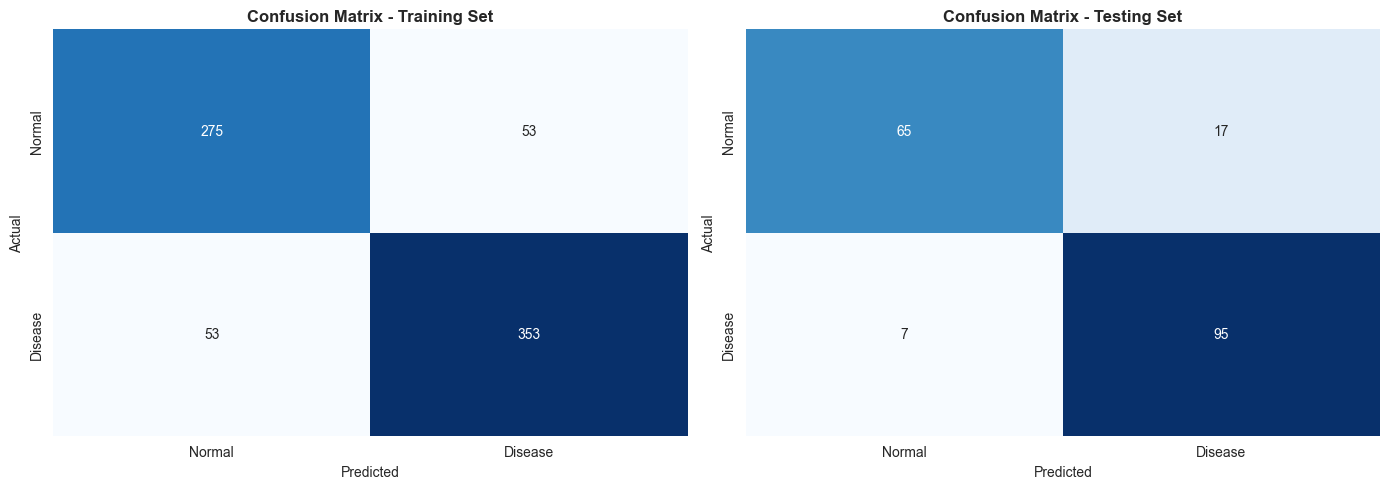

In [68]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
axes[0].set_title('Confusion Matrix - Training Set', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Testing set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False,
            xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
axes[1].set_title('Confusion Matrix - Testing Set', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

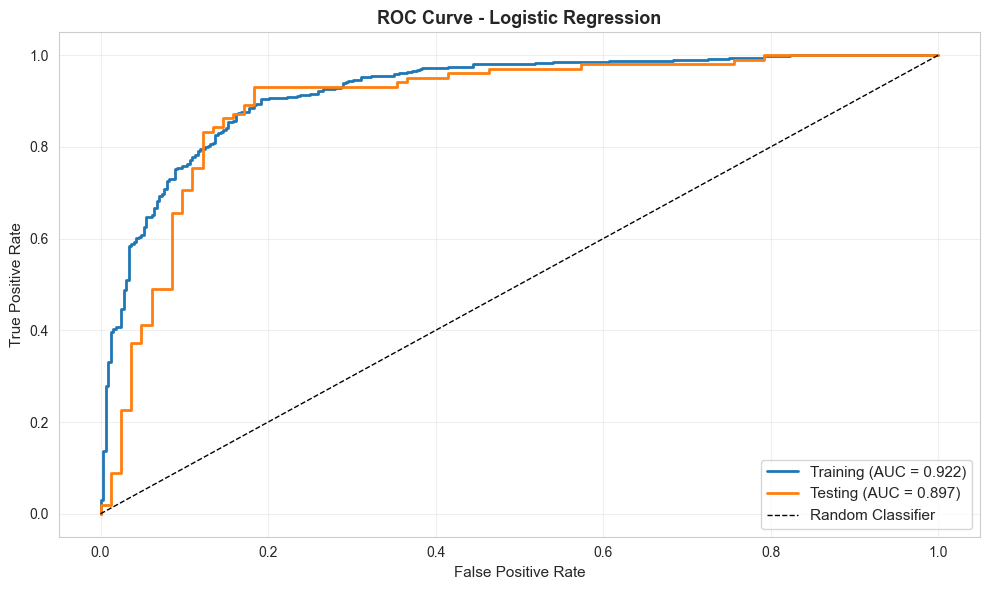

In [69]:
# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {train_auc:.3f})', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f'Testing (AUC = {test_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve - Logistic Regression', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

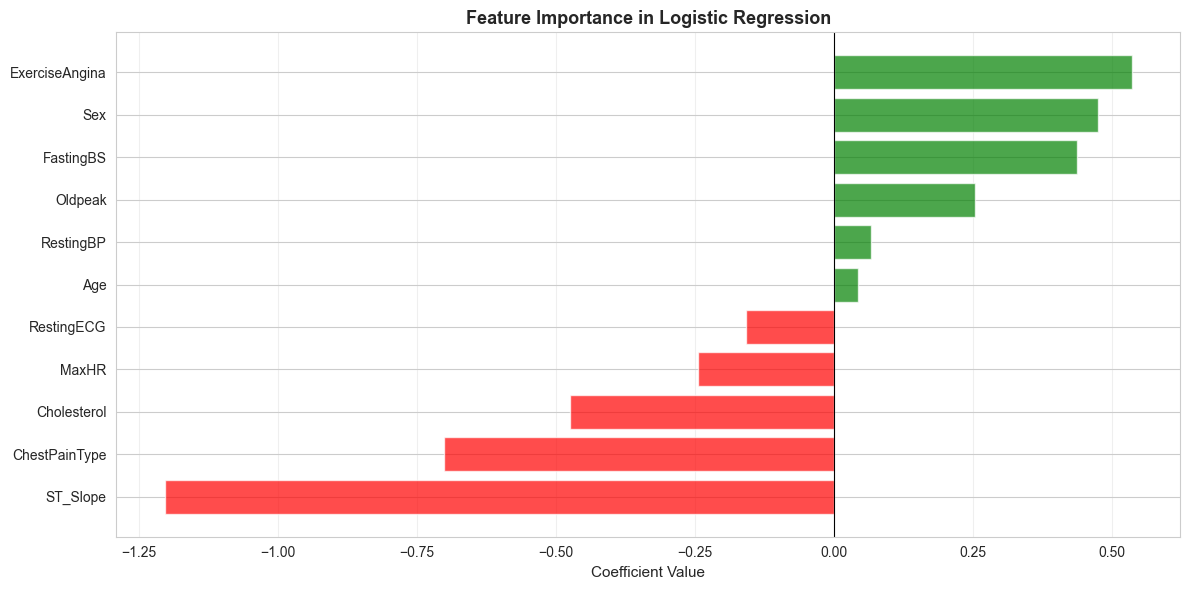


Feature Importance Interpretation:
------------------------------------------------------------
ST_Slope             (-1.2041) - decreases likelihood of Heart Disease
ChestPainType        (-0.7023) - decreases likelihood of Heart Disease
Cholesterol          (-0.4749) - decreases likelihood of Heart Disease
MaxHR                (-0.2434) - decreases likelihood of Heart Disease
RestingECG           (-0.1571) - decreases likelihood of Heart Disease
Age                  ( 0.0430) - increases likelihood of Heart Disease
RestingBP            ( 0.0677) - increases likelihood of Heart Disease
Oldpeak              ( 0.2535) - increases likelihood of Heart Disease
FastingBS            ( 0.4382) - increases likelihood of Heart Disease
Sex                  ( 0.4765) - increases likelihood of Heart Disease
ExerciseAngina       ( 0.5362) - increases likelihood of Heart Disease


In [70]:
# Feature Importance (Coefficients)
plt.figure(figsize=(12, 6))
feature_importance = coefficients.sort_values('Coefficient', ascending=True)
colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=11)
plt.title('Feature Importance in Logistic Regression', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nFeature Importance Interpretation:")
print("-" * 60)
for idx, row in feature_importance.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']:<20} ({row['Coefficient']:>7.4f}) - {direction} likelihood of Heart Disease")

In [71]:
# Prediction on new data (example)
print("\nExample Predictions on Test Set:")
print("-" * 80)
sample_indices = [0, 5, 10, 15, 20]
for idx in sample_indices:
    if idx < len(X_test_scaled):
        actual = 'Disease' if y_test.iloc[idx] == 1 else 'Normal'
        predicted = 'Disease' if y_test_pred[idx] == 1 else 'Normal'
        probability = y_test_pred_proba[idx]
        match = "✓" if y_test_pred[idx] == y_test.iloc[idx] else "✗"
        print(f"Sample {idx}: Actual={actual:<10} Predicted={predicted:<10} Probability={probability:.4f} {match}")


Example Predictions on Test Set:
--------------------------------------------------------------------------------
Sample 0: Actual=Disease    Predicted=Disease    Probability=0.9730 ✓
Sample 5: Actual=Normal     Predicted=Disease    Probability=0.8912 ✗
Sample 10: Actual=Disease    Predicted=Disease    Probability=0.6844 ✓
Sample 15: Actual=Disease    Predicted=Disease    Probability=0.9766 ✓
Sample 20: Actual=Normal     Predicted=Normal     Probability=0.1350 ✓
